                                                           **BÀI TẬP COLAB SỐ 01** 




RECOGNIZING HAND-WRITTEN DIGITS

LỚP: CS114.L22.KHCL

NHÓM:

- Trịnh Tuấn Nam - 19521874

- Nguyễn Dương Hải - 19521464

Nguồn tham khảo:

Recognizing hand-written digits - [LINK](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py)

In [ ]:
%matplotlib inline


# Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.


In [ ]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


## Digits dataset

The digits dataset consists of 8x8
pixel images of digits. The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image. We will use these arrays to
visualize the first 4 images. The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.

Note: if we were working from image files (e.g., 'png' files), we would load
them using :func:`matplotlib.pyplot.imread`.



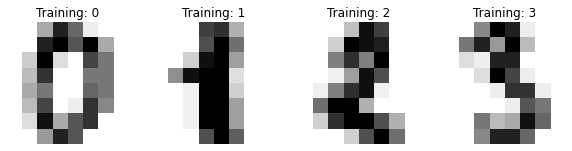

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print(data[0])

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)
print(X_test)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[[ 0.  0.  1. ... 12.  1.  0.]
 [ 0.  0.  6. ...  6.  0.  0.]
 [ 0.  0.  0. ...  2.  0.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


Below we visualize the first 4 test samples and show their predicted
digit value in the title.



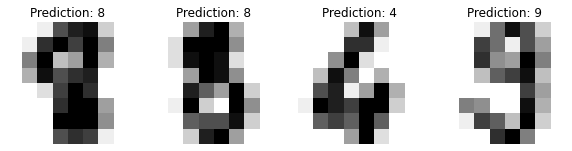

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

:func:`~sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.



In [ ]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


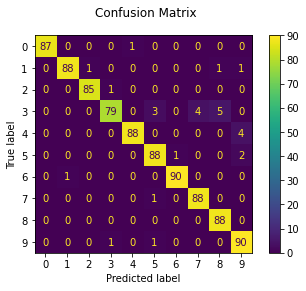

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


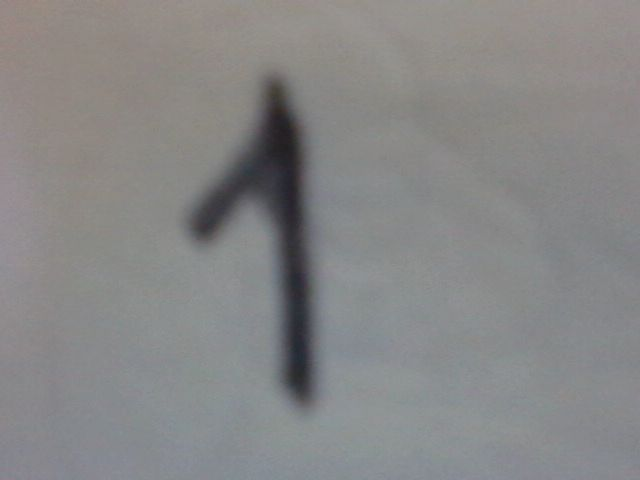

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))

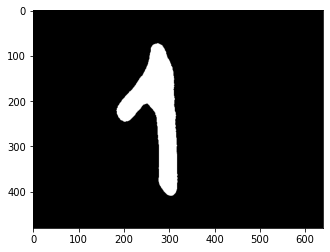

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Đọc hình ảnh chụp từ webcam
image = cv2.imread('photo.jpg')
# Chuyển ảnh về thang mày xám
im_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# Làm mịn ảnh
im_blur = cv2.GaussianBlur(im_gray,(5,5),0)
# Chuyển về ảnh nhị phân
im,thre = cv2.threshold(im_blur,115,255,cv2.THRESH_BINARY_INV)
plt.imshow(thre, cmap = 'gray')

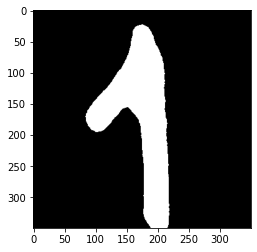

In [ ]:
# Cắt hình để loại bỏ bớt phần nền
crop_img = thre[50:400,100:450]
plt.imshow(crop_img, cmap = 'gray')

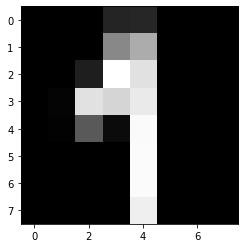

In [ ]:
#resize về 8x8 để giống với bộ dataset
img_gray = cv2.resize(crop_img,(8,8),interpolation = cv2.INTER_AREA)
# Vì các giá trị từ ma trận của ảnh trên dataset thuộc khoảng [0-16] nên thay đổi giá trị của ảnh
img_gray = img_gray/255 * 15
plt.imshow(img_gray, cmap = 'gray')
# Chuyển về ma trận 1x64
img_gray = img_gray.reshape(1, 64)

In [ ]:
print(clf.predict(img_gray))

[1]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Số lượng ảnh từ drive: 20


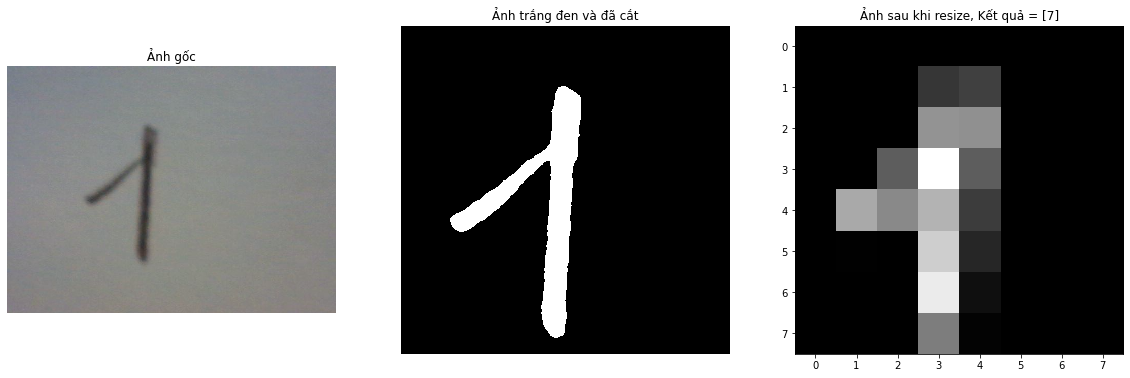

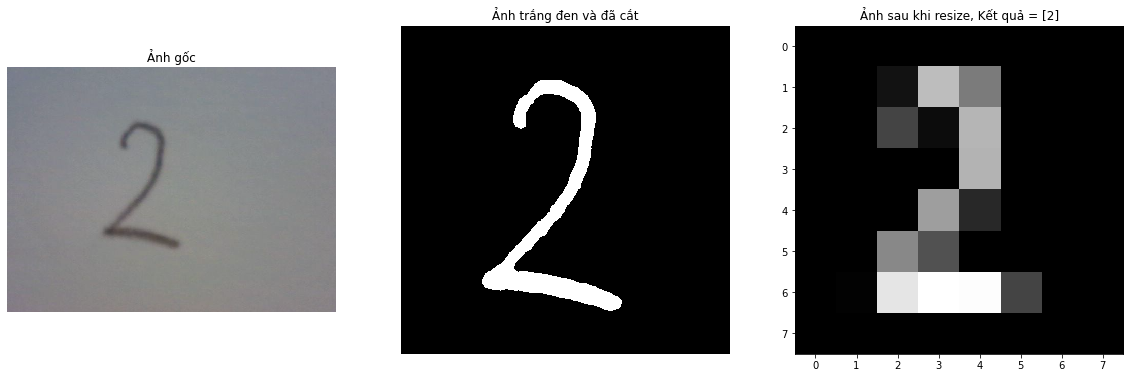

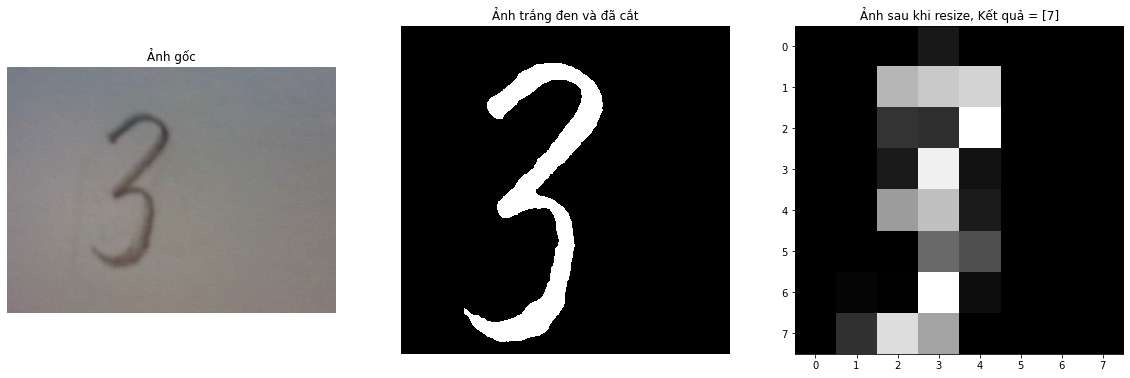

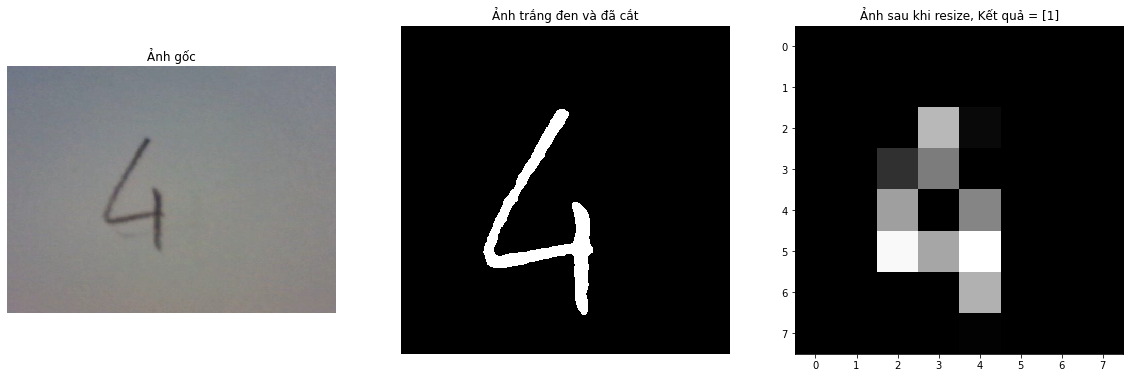

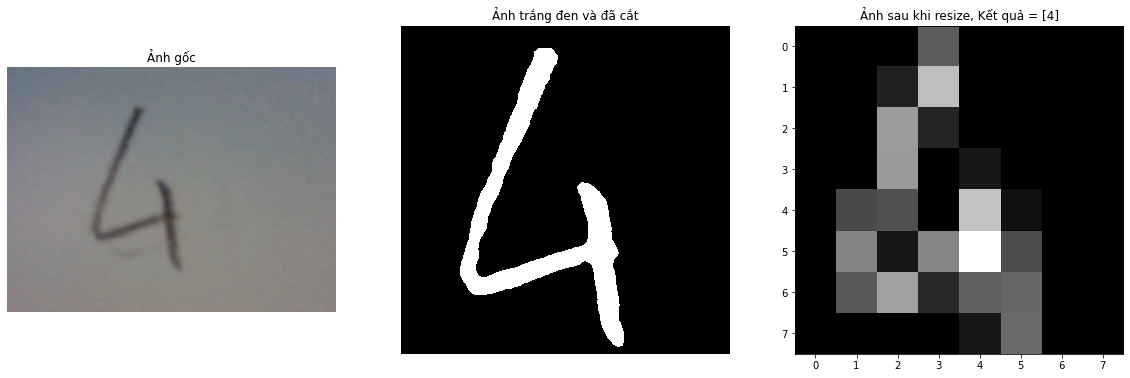

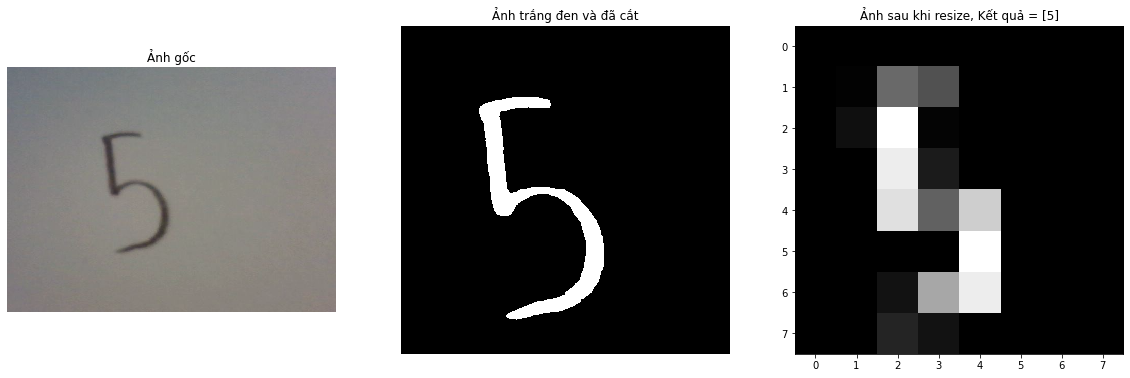

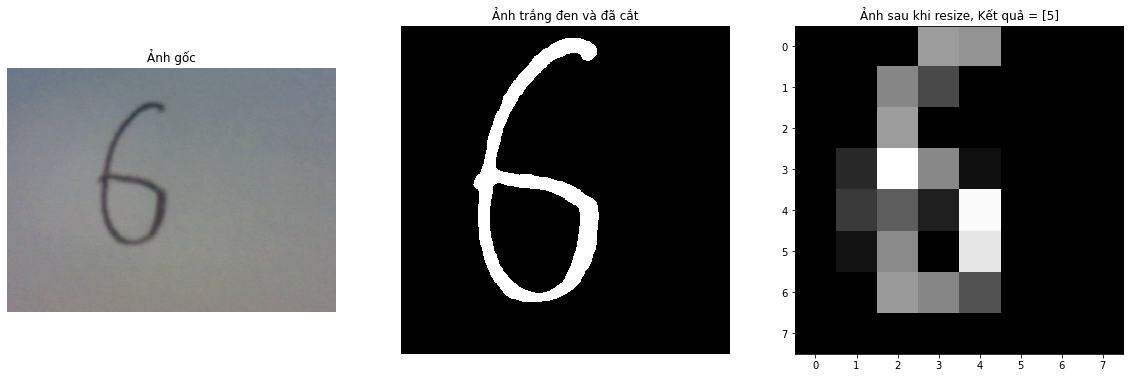

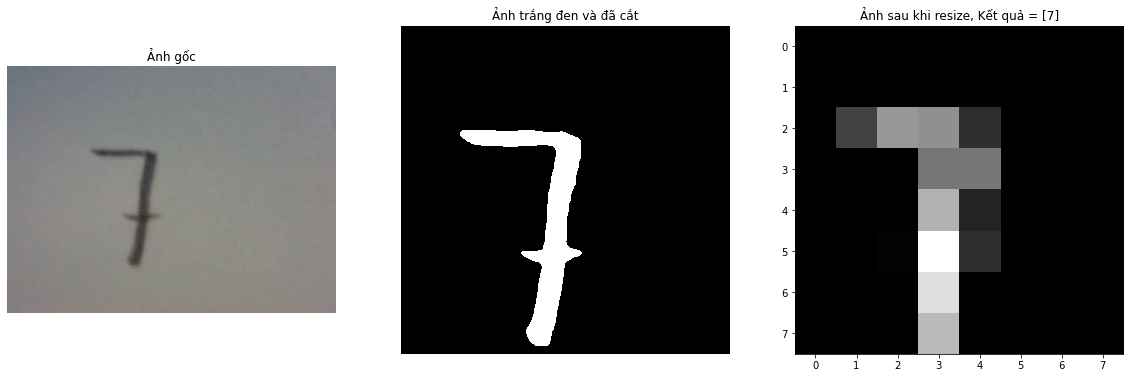

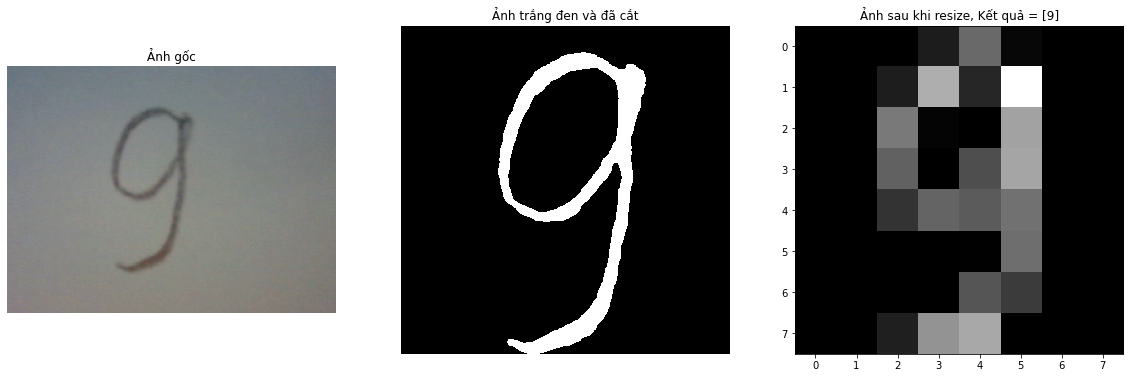

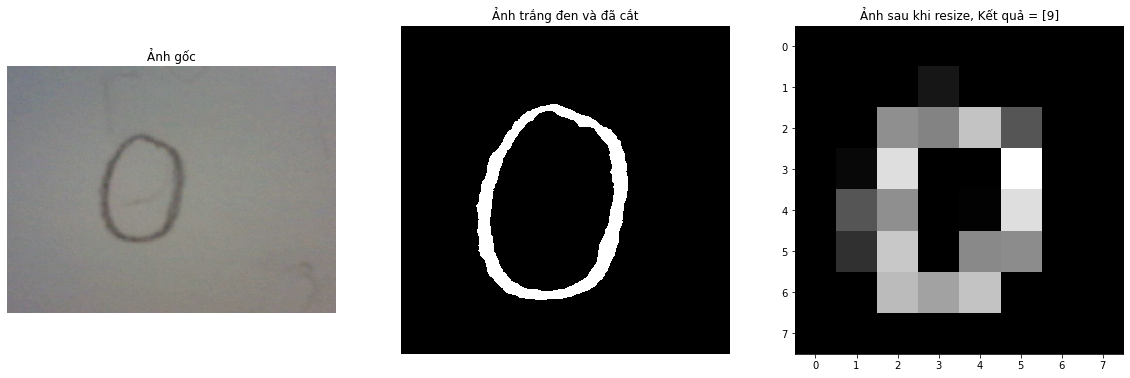

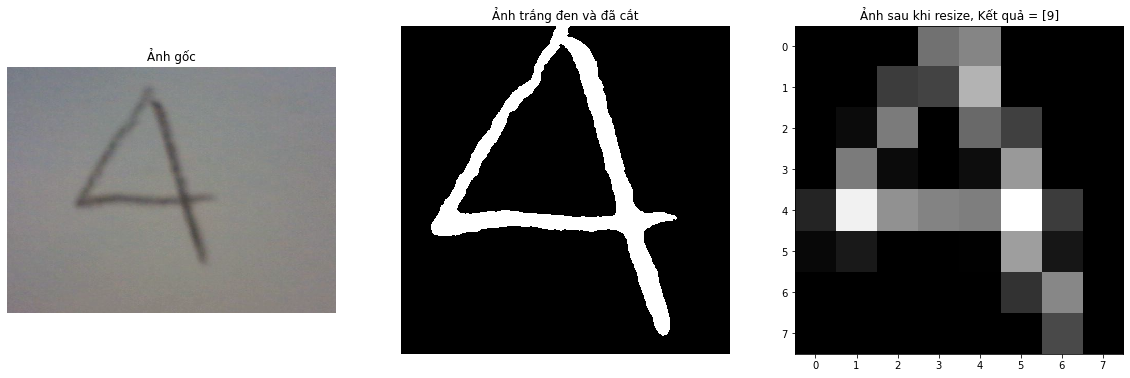

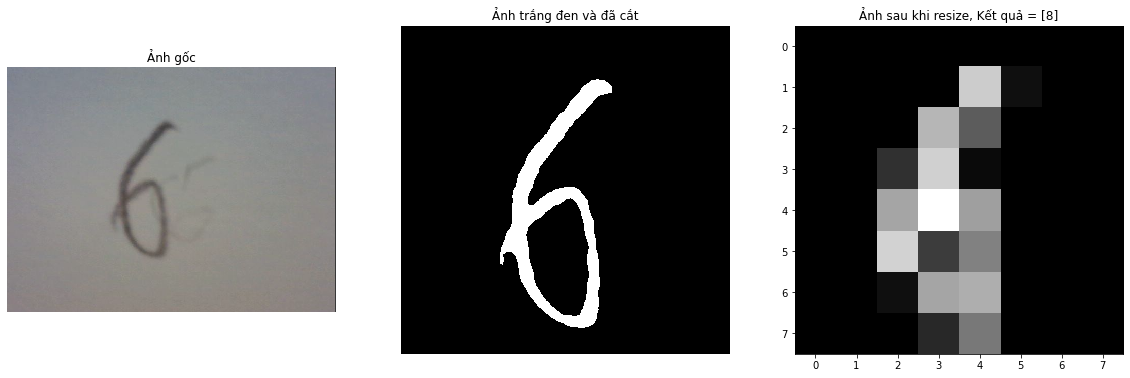

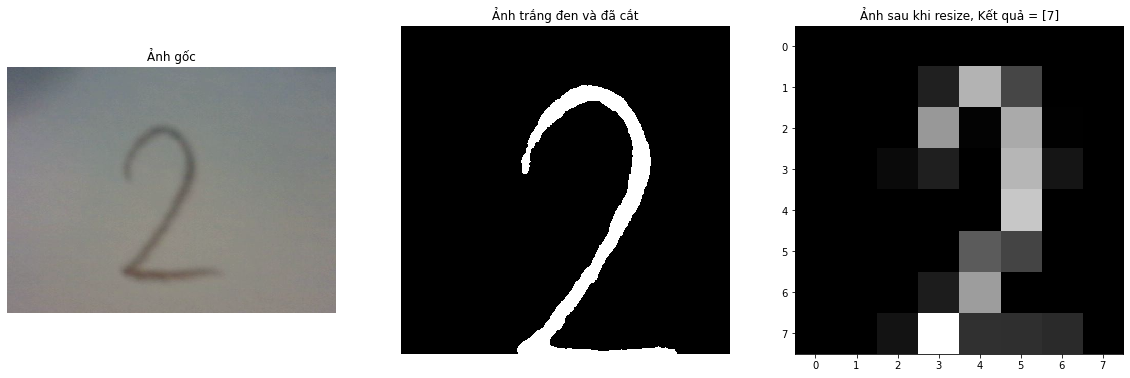

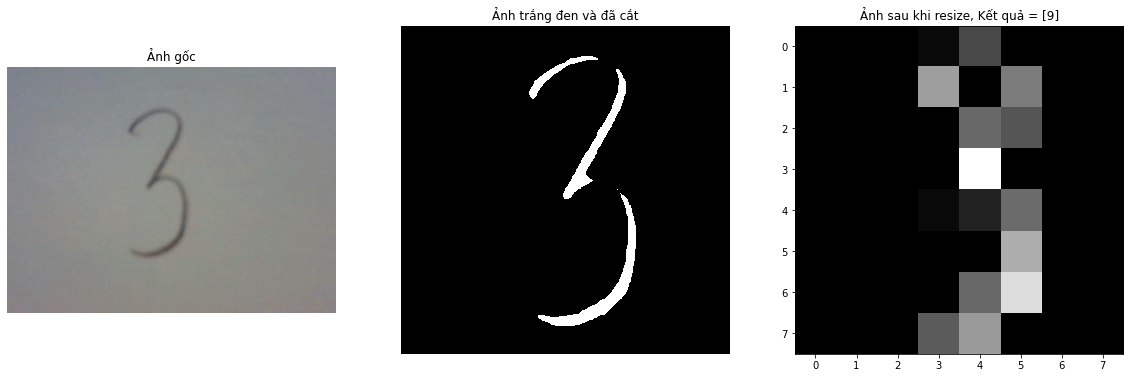

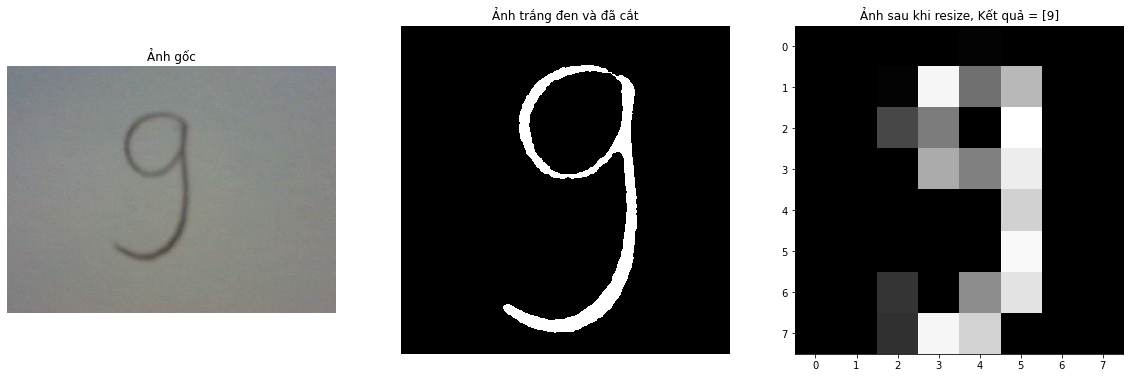

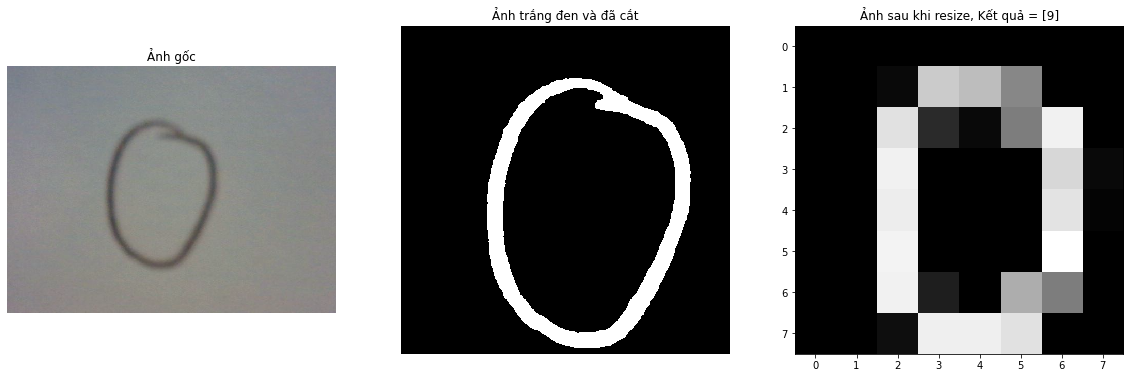

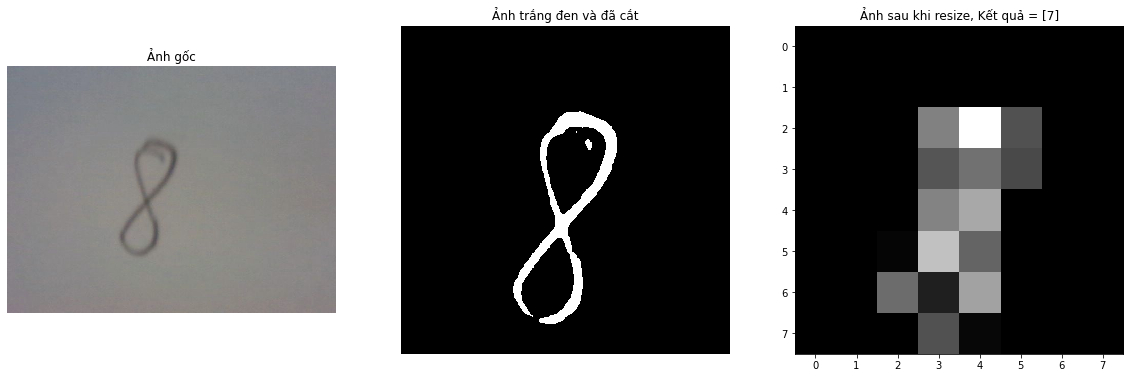

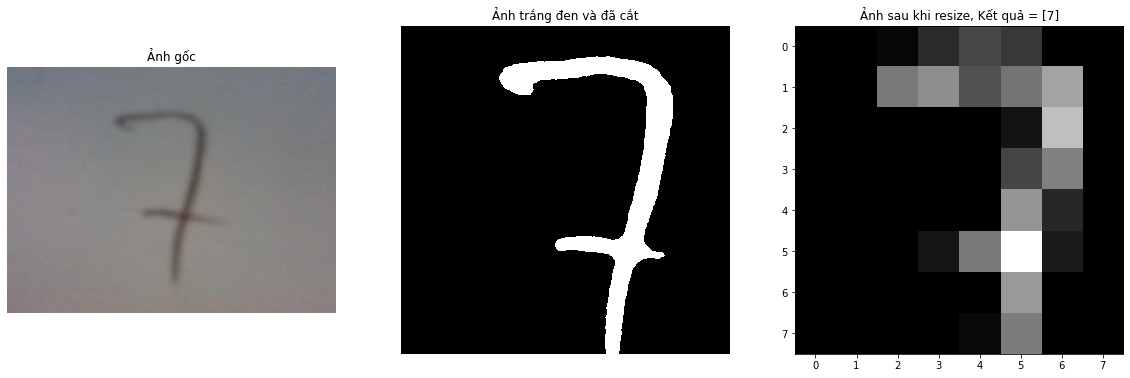

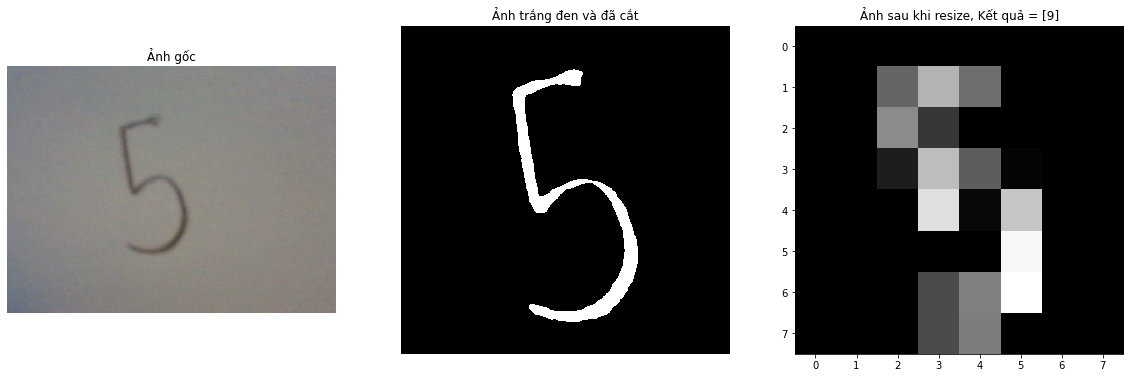

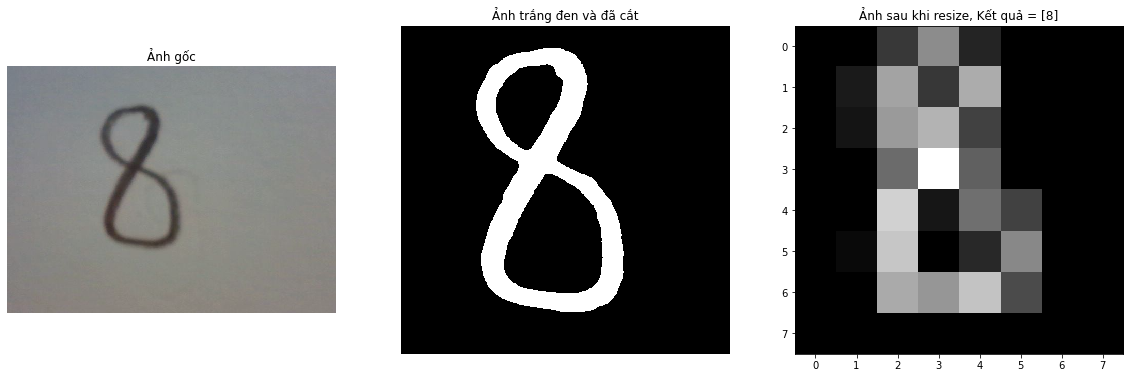

In [ ]:
import os
from google.colab.patches import cv2_imshow

# Lấy đường link truy cập vào dataset ảnh từ drive
# Link ảnh từ drive: https://drive.google.com/drive/u/0/folders/1YX0KhCEit3uSWiPxWfOeqDFQClQGH7My
link_drive = '/content/drive/MyDrive/Image_colab1/'
all_datas = os.listdir(link_drive)
# Số lượng ảnh từ drive
n_images = len(all_datas)
print("Số lượng ảnh từ drive:", n_images)
for i in range(n_images):
  image = cv2.imread(link_drive + all_datas[i])
  _, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
  ax = axes[0]
  ax.set_axis_off()
  ax.imshow(image, interpolation='nearest')
  ax.set_title(f'Ảnh gốc')
  ax = axes[1]
  ax.set_axis_off()
  # Đọc ảnh thang màu xám
  image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  image_blur = cv2.GaussianBlur(image_gray,(5,5),0)

  #Chuyển đổi hình ảnh thang độ xám thành nhị phân
  im,thre = cv2.threshold(image_blur,115,255,cv2.THRESH_BINARY_INV)

  ax.imshow(thre,cmap='gray', interpolation='nearest')
  ret,thresh2 = cv2.threshold(thre,200,255,cv2.THRESH_BINARY_INV)
  crop_img = thre[50:400,100:450]
  ax.imshow(crop_img,cmap='gray', interpolation='nearest')
  ax.set_title(f'Ảnh trắng đen và đã cắt')

  #Resize ảnh
  ax = axes[2]

  a = cv2.resize(crop_img,(8,8),interpolation = cv2.INTER_AREA)
  a = a/255 * 15
  plt.imshow(a, cmap = 'gray', interpolation='nearest')
  a = a.reshape(1, 64)
  
  #Kết quả dự đoán
  predict = clf.predict(a)
  ax.set_title(f'Ảnh sau khi resize, Kết quả = {predict}')


##KẾT QUẢ:

1. Kết quả chạy thức tế với webcam của laptop và giấy viết tay của các bạn có tốt không?

  Không tốt

2. Ủa mà nhìn vào đâu để kết luận là tốt hay không?

  Ảnh chụp webcam của laptop phải qua nhiều bước xử lý hình ảnh để có được kết quả. Kết quả nhận diện từ tập ảnh trên drive đúng là: 8/20

3. Nếu không tốt thì lý do tại sao?



*   Ảnh phải qua nhiều bước tiền xử lí trước khi được nhận diện và kỹ thuật xử lí của nhóm là chưa tốt
    - Ảnh sau khi xử lí bị mất dữ liệu
      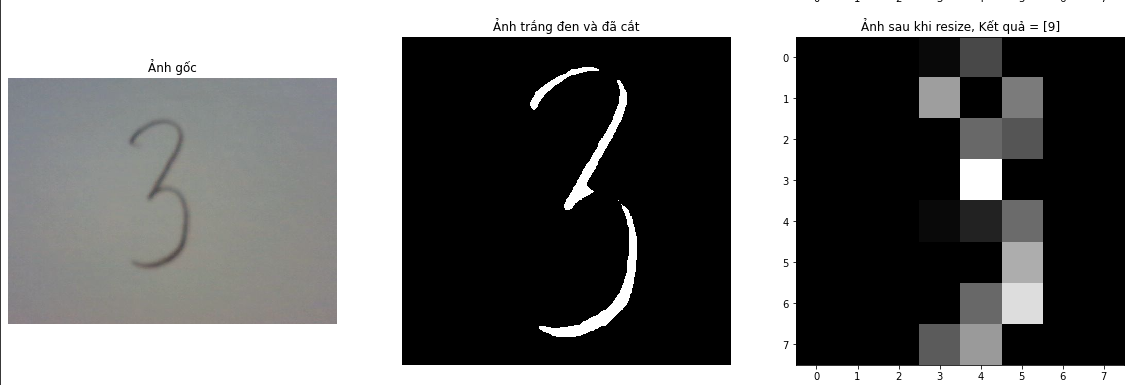

    - Khi resize ảnh sẽ khiên ảnh không còn rõ số như ảnh chụp
      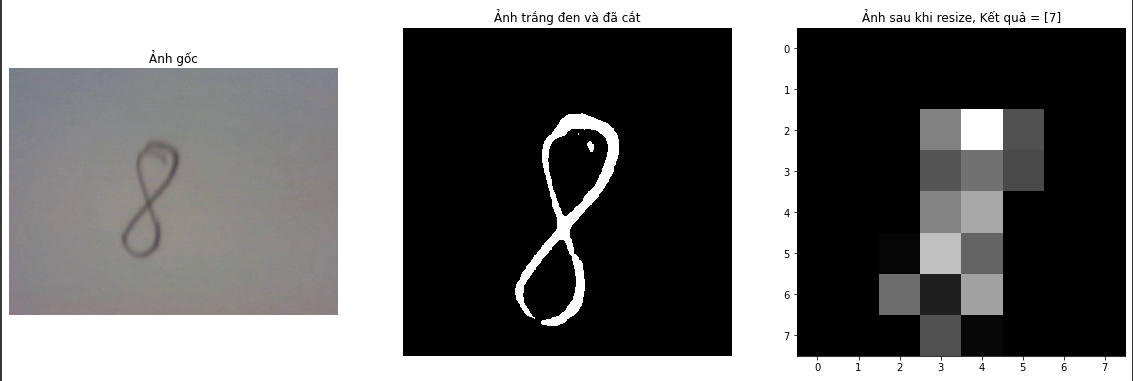
    - Sử dụng phương pháp cắt ảnh thủ công. Với những góc chụp khác nhau ảnh có thể sẽ bị mất dữ liệu
      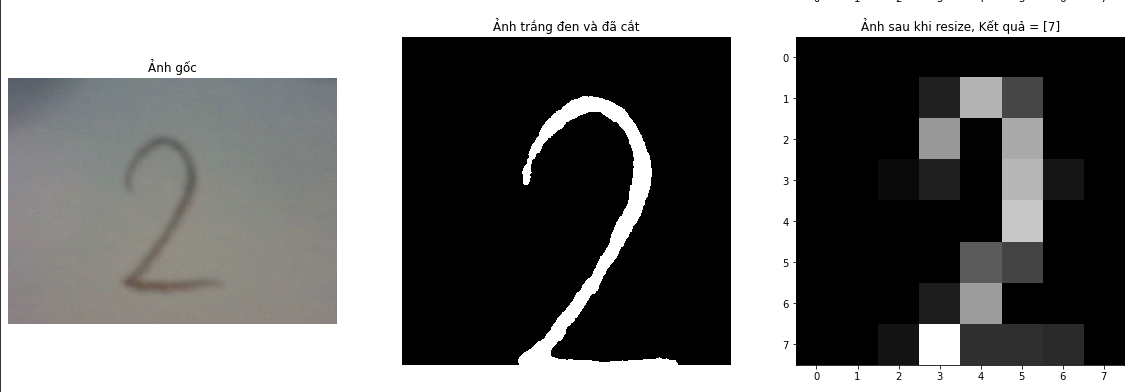

*  Ảnh bị bị tác động bởi nhiều yếu tố
  - Độ sáng tối khi chụp
  - Nền viết chữ(Ảnh của nhóm đã sử dụng nền trắng để viết nhưng đối với những trường hợp viết trên giấy vở ô li thì cách xử lí ảnh của nhóm không phù hợp ảnh sẽ bị nhiễu)
  - Nét viết chữ đậm nhạt cũng ảnh hưởng đến việc nhận diện(với những nét đậm rõ ràng khả năng nhận diện đúng tốt hơn với những nét chữu mờ)
  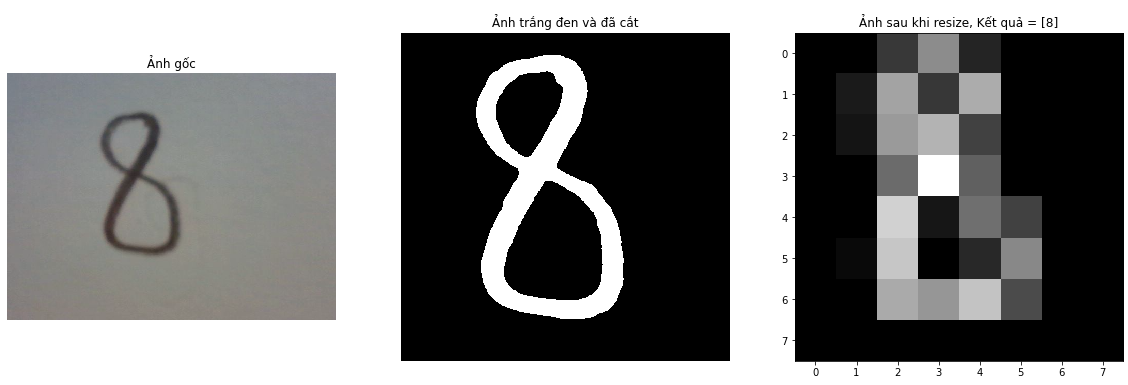
  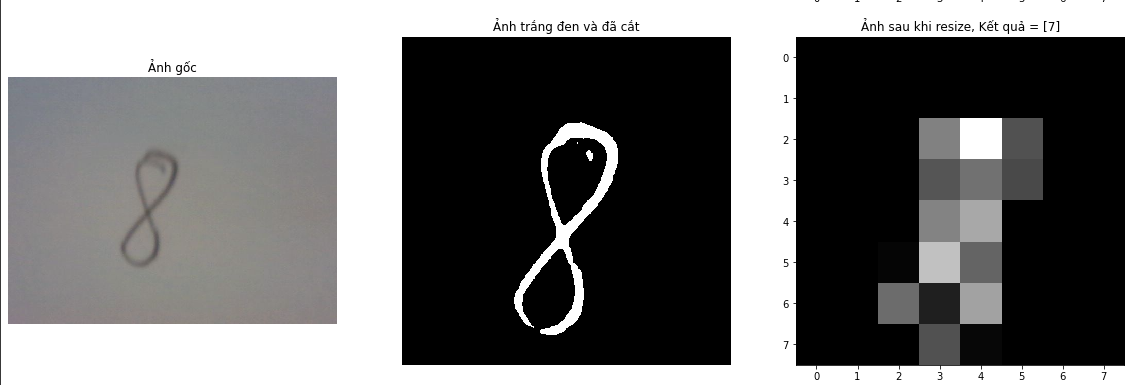

4. Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?

  - Không thể dùng model trên để nhận dạng biển số nhà vì như các ảnh ví dụ ở trên thì ảnh từ webcam cho độ chính xác rất thấp chưa kể biển số nhà không chỉ có số mà còn có thể có chữ, kí tự đặc biệt,.....


